In [3]:
import itertools
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pickle

from zema_generate_model import generate_model
from load_achsemat import load_achsemat
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open('best_parameters_simple.dict', "rb") as f:
    params = pickle.load(f)
print(params)

model = generate_model(params)
print(model.summary())

{'layers': {'layer_1': {'activation': 'tanh', 'dropout_rate': 0.0, 'n_units': 100}, 'layer_2': {'activation': 'relu', 'dropout_rate': 0.0, 'n_units': 550}, 'layer_3': {'activation': None, 'dropout_rate': 0.0, 'n_units': 1000}}, 'optimizer': 'rmsprop', 'use_bias': True}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11, 100)           200100    
                                                                 
 dropout (Dropout)           (None, 11, 100)           0         
                                                                 
 dense_1 (Dense)             (None, 11, 550)           55550     
                                                                 
 dropout_1 (Dropout)         (None, 11, 550)           0         
                                                                 
 dense_2 (Dense)             (None, 11, 1000)     

In [5]:
model.compile(
        optimizer=params['optimizer'], loss="mean_squared_error", metrics=["mse"]
    )

In [6]:
trainData, trainTarget = load_achsemat()

c:\users\vedurm01\pycharmprojects\zema_ml\venv\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [7]:
model.fit(trainData, trainTarget, epochs=100, validation_split=0.1, verbose=0)

In [13]:
min(model.history.history['loss'])

3.334486484527588

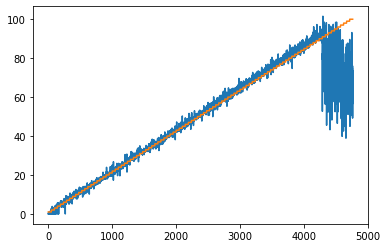

In [16]:
plt.plot(model.predict(trainData))
plt.plot(trainTarget)

In [17]:
'dropout_rate'.format(1)

'dropout_rate'